#   **Pattern recognition course | ECE AUTH | 3nd project | Winter semester 2022**

# **Floriculture Laboratory of the Department of Agriculture**

![ logo](iris.png)



>   Giachoudis Christos


>   Kostopoulos Andreas Marios

# **General comments**



# Necessary imports

In [1]:
# Importing the necessary libraries and modules
import numpy as np
import math
import matplotlib.pyplot as plt
import sklearn as skl
import pandas as pd
from sklearn.datasets import load_iris
import random
import statistics

# **Part A**

## **Iris plants dataset**

In [2]:
# import dataset
dataset = load_iris(as_frame=True)

# show dataset summary statistics
dataset['data'].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# show dataset statistics
dataset['data'].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
# show how many values we have in each class
dataset['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

### **No normalization is needed**

<AxesSubplot: >

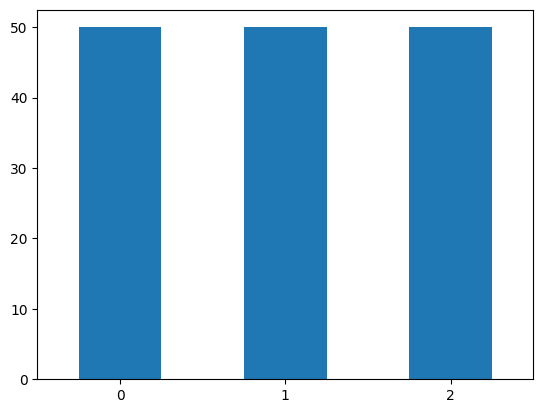

In [5]:
# data quantity vizualization
dataset.target.value_counts().plot(kind='bar', rot=0)

### **Pandas is in the game**
### **Discarding the unnecessary data**

In [6]:
# convert to pandas dataframe (giati h zwh na einai toso dyskolh???)
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target

# discard what I don't need (2 and 3 are the columns we do not need)
df.drop(df.columns[[2, 3]], axis=1, inplace=True)
# print(df) # just checking

# just checking
X = df.get(["sepal length (cm)", "sepal width (cm)"])
y = df.get("target")
print(X)
print(y)

     sepal length (cm)  sepal width (cm)
0                  5.1               3.5
1                  4.9               3.0
2                  4.7               3.2
3                  4.6               3.1
4                  5.0               3.6
..                 ...               ...
145                6.7               3.0
146                6.3               2.5
147                6.5               3.0
148                6.2               3.4
149                5.9               3.0

[150 rows x 2 columns]
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32


### **Training and testing split**

In [7]:
# training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=True, random_state=42)

# Delete (?)
print("The X_train set is:")
print(X_train)

print("The X_test set is:")
print(X_test)

print("The y_train set is:")
print(y_train)

print("The y_test set is:")
print(y_test)

The X_train set is:
     sepal length (cm)  sepal width (cm)
84                 5.4               3.0
148                6.2               3.4
53                 5.5               2.3
5                  5.4               3.9
93                 5.0               2.3
..                 ...               ...
71                 6.1               2.8
106                4.9               2.5
14                 5.8               4.0
92                 5.8               2.6
102                7.1               3.0

[75 rows x 2 columns]
The X_test set is:
     sepal length (cm)  sepal width (cm)
73                 6.1               2.8
18                 5.7               3.8
118                7.7               2.6
78                 6.0               2.9
76                 6.8               2.8
..                 ...               ...
113                5.7               2.5
33                 5.5               4.2
138                6.0               3.0
101                5.8              

### **Training and testing the tree**

In [8]:
from sklearn import tree
from sklearn import metrics

# a list to hold the accuracies for different depths
accuracy_list = list()

# for each depth train a tree and compute the accuracy
for depth in range(1, 20):
  clf = tree.DecisionTreeClassifier(max_depth=depth, random_state=0)
  clf = clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
  accuracy_list.append(accuracy)

# print results
accuracy_array = np.array(accuracy_list) # numpy array to make life easier
print(f"Accuracy based on depth: {accuracy_list}")
best_accuracy = max(accuracy_list)
best_depth = np.argmax(accuracy_array) + 1
print(f"Best Accuracy is: {best_accuracy}% and is achived at depth: {best_depth}")

Accuracy based on depth: [64.0, 77.33, 78.67, 77.33, 77.33, 77.33, 72.0, 73.33, 73.33, 74.67, 70.67, 70.67, 70.67, 70.67, 70.67, 70.67, 70.67, 70.67, 70.67]
Best Accuracy is: 78.67% and is achived at depth: 3


### **Rebuild the tree with the best depth**

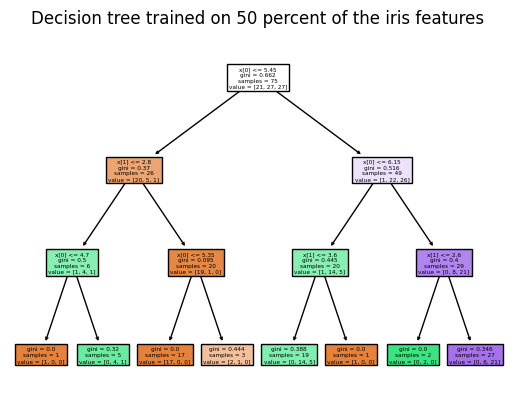

In [9]:
from sklearn import tree

# train the tree
clf = tree.DecisionTreeClassifier(max_depth=best_depth)
clf = clf.fit(X_train, y_train)

# vizualize the tree
plt.figure()
tree.plot_tree(clf, filled=True)
plt.title("Decision tree trained on 50 percent of the iris features")
plt.show()

### **Prediction**

In [10]:
# use the tree to make the classification on the test set
y_pred = clf.predict(X_test)

### **Results**

**Accuracy**

In [11]:
# print("Accuracy:", round(skl.metrics.accuracy_score(y_test, y_pred) * 100, 2), "%")
print(f"Accuracy: {best_accuracy}%")

Accuracy: 78.67%


**Classification report**

In [12]:
print(skl.metrics.classification_report(y_test, y_pred, target_names=dataset.target_names))

              precision    recall  f1-score   support

      setosa       1.00      0.97      0.98        29
  versicolor       0.64      0.70      0.67        23
   virginica       0.68      0.65      0.67        23

    accuracy                           0.79        75
   macro avg       0.77      0.77      0.77        75
weighted avg       0.79      0.79      0.79        75



**Confusion matrix**

[28  1  0  0 16  7  0  8 15]


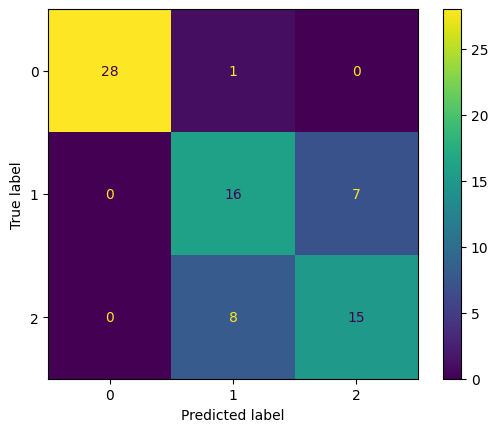

In [13]:
results = skl.metrics.confusion_matrix(y_test, y_pred, labels=clf.classes_).ravel()
print(results)

disp = skl.metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [14]:
# convert to numpy to make life easier
X_data = pd.DataFrame.to_numpy(X_test)
y_data = pd.Series.to_numpy(y_test)

### **Decision Boundaries**

c:\Users\Andreas Marios\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Andreas Marios\AppData\Local\Temp\ipykernel_19044\695314837.py:33: UserWarning: The following kwargs were not used by contour: 'c_map'
  cs = plt.contourf(xx, yy, Z, c_map=plt.cm.RdYlBu, alpha=0.3)


(3.3, 8.880000000000006, 1.0, 5.380000000000004)

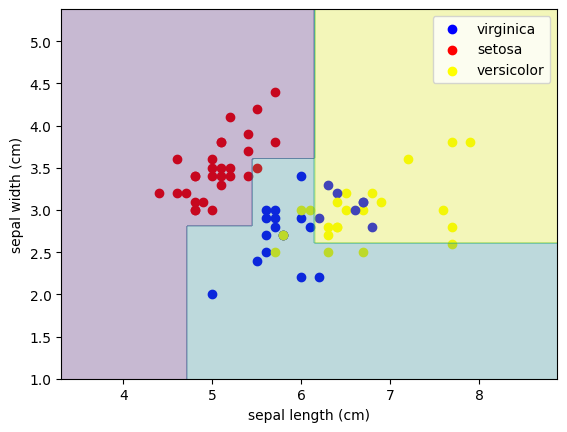

In [15]:
# set the parameters
h = 0.02    # setting a random step
a = df.get("sepal length (cm)")
b = df.get("sepal width (cm)")
x_min, x_max = a.min() - 1, a.max() + 1
y_min, y_max = b.min() - 1, b.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)

# Make the scatter plot
color = "white"
for i in range(len(y_data)):
    # paint each point
    if y_data[i] == 0:
        color = "red"
    elif y_data[i] == 1:
        color = "blue"
    else:
        color = "yellow"
    # plot each point
    plt.scatter(X_data[i][0], X_data[i][1], color=color)
# make the plot vizually beautiful
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.legend(["virginica", "setosa", "versicolor"])

# plot the decision boundary
cs = plt.contourf(xx, yy, Z, c_map=plt.cm.RdYlBu, alpha=0.3)
plt.axis('tight')



# **Part B**

In [16]:
# Converting X_train dataset (A) from pandas DataFrame to numpy array
X_train_data = pd.DataFrame.to_numpy(X_train)
y_train_data = pd.Series.to_numpy(y_train)

### **Bootstrap**

In [113]:
# Bootstrap method
samples = [] # the placeholder for the 100 samples?????????????????????
samp_num = 100 # number of bootstraped samples
gamma = 0.5 # γ = 50%

x_train_list = list() # the placeholder for the 100 samples
y_train_list = list() # the placeholder for the 100 samples
# x_test_list = list() # ???????????????????????
# y_test_list = list() # ???????????????????????

for i in range(samp_num):
  X_tr, X_t, y_tr, y_t = train_test_split(X_train, y_train, test_size=gamma, shuffle=True, random_state=i)
  x_train_list.append(X_tr)
  # x_test_list.append(X_t)?????????????????
  y_train_list.append(y_tr)
  # y_test_list.append(y_t)?????????????????


### **Random forest**

In [114]:
# Random best depth
best_depth = 5
y_prediction_list = list()

# Creating the random forest (100 trees)
for i in range(samp_num):
    clf = tree.DecisionTreeClassifier(max_depth=best_depth, random_state=42)
    clf = clf.fit(x_train_list[i], y_train_list[i])
    y_predict = clf.predict(X_test)
    y_prediction_list.append(y_predict)

In [115]:
# Collecting most frequent value for each corresponding x_test value
frequent_predictions = list()

for column in range(len(y_prediction_list[0])):
    temp_list = list()
    for row in range(len(y_prediction_list)):
        temp_list.append(y_prediction_list[row][column])
    frequent_predictions.append(temp_list)

predicted_values_list = list()
# predicted_values = np.array(predicted_values_list)

# Calculating the most frequent values
for i in range(len(frequent_predictions)):
    temp = np.bincount(frequent_predictions[i]).argmax()
    # print(temp)
    predicted_values_list.append(temp)

### **Random forest accuracy**

In [116]:
accuracy = round(metrics.accuracy_score(y_test, predicted_values_list) * 100, 2)
print(f"Accuracy: {accuracy}%")

Accuracy: 80.0%


### **Confusion matrix**

[28  1  0  0 16  7  0  7 16]


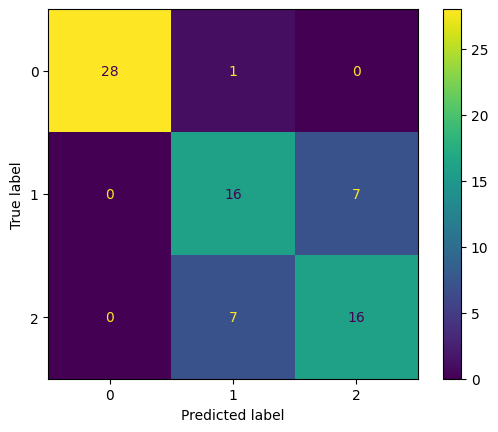

In [21]:
results = skl.metrics.confusion_matrix(y_test, predicted_values_list).ravel()
print(results)

disp = skl.metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted_values_list)

### **Decision Boundaries**

c:\Users\Andreas Marios\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Andreas Marios\AppData\Local\Temp\ipykernel_19044\2807062296.py:18: UserWarning: The following kwargs were not used by contour: 'c_map'
  plt.contourf(xx, yy, z_axis, c_map=plt.cm.RdYlBu, alpha=0.1)
c:\Users\Andreas Marios\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Andreas Marios\AppData\Local\Temp\ipykernel_19044\2807062296.py:18: UserWarning: The following kwargs were not used by contour: 'c_map'
  plt.contourf(xx, yy, z_axis, c_map=plt.cm.RdYlBu, alpha=0.1)
c:\Users\Andreas Marios\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not hav

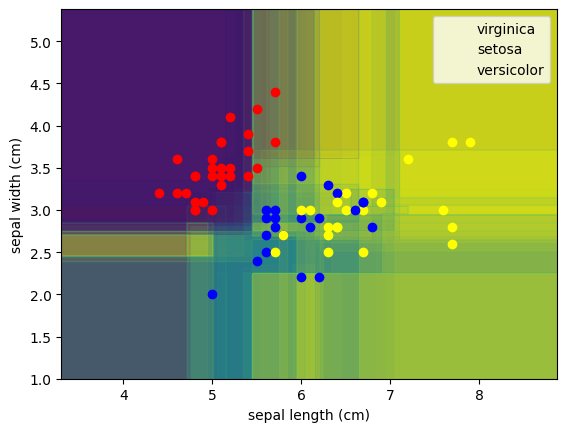

In [22]:
# make a grid based on the dataset values
h = 0.02
a = df.get("sepal length (cm)")
b = df.get("sepal width (cm)")
x_min, x_max = a.min() - 1, a.max() + 1
y_min, y_max = b.min() - 1, b.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
zetas = list()

# Creating the random forest (100 trees)
fig = plt.figure()
samp_num = 100
for i in range(samp_num):
    clf = tree.DecisionTreeClassifier(max_depth=best_depth, random_state=42)
    clf = clf.fit(x_train_list[i], y_train_list[i])
    z_axis = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    z_axis = z_axis.reshape(xx.shape)
    plt.contourf(xx, yy, z_axis, c_map=plt.cm.RdYlBu, alpha=0.1)

plt.axis('tight')

color = "white"
for i in range(len(y_data)):
    if y_data[i] == 0:
        color = "red"
    elif y_data[i] == 1:
        color = "blue"
    else:
        color = "yellow"
    plt.scatter(X_data[i][0], X_data[i][1], color=color)
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.legend(["virginica", "setosa", "versicolor"])

# Observations

We observe that in the case of the forest the decision boundaries are more complex than in the case of a simple tree. In the first part the boundaries were clear, but in the second part (forest) there is an overlap between the decision boundaries.

### **$γ$ influence on accuracy**

We will manually compute the accuracy of the forest for some γ values and then we will present the outcome and the observations.

In [112]:
# Bootstrap method
samples = [] # the placeholder for the 100 samples?????????????????????
samp_num = 100 # number of bootstraped samples
gamma = 0.7 # γ = 50%

x_train_list = list() # the placeholder for the 100 samples
y_train_list = list() # the placeholder for the 100 samples
# x_test_list = list() # ???????????????????????
# y_test_list = list() # ???????????????????????

for i in range(samp_num):
  X_tr, X_t, y_tr, y_t = train_test_split(X_train, y_train, test_size=gamma, shuffle=True, random_state=i)
  x_train_list.append(X_tr)
  # x_test_list.append(X_t)?????????????????
  y_train_list.append(y_tr)
  # y_test_list.append(y_t)?????????????????

# Random best depth
best_depth = 2
y_prediction_list = list()

# Creating the random forest (100 trees)
for i in range(samp_num):
    clf = tree.DecisionTreeClassifier(max_depth=best_depth, random_state=42)
    clf = clf.fit(x_train_list[i], y_train_list[i])
    y_predict = clf.predict(X_test)
    y_prediction_list.append(y_predict)

# Collecting most frequent value for each corresponding x_test value
frequent_predictions = list()

for column in range(len(y_prediction_list[0])):
    temp_list = list()
    for row in range(len(y_prediction_list)):
        temp_list.append(y_prediction_list[row][column])
    frequent_predictions.append(temp_list)

predicted_values_list = list()
# predicted_values = np.array(predicted_values_list)

# Calculating the most frequent values
for i in range(len(frequent_predictions)):
    temp = np.bincount(frequent_predictions[i]).argmax()
    # print(temp)
    predicted_values_list.append(temp)

accuracy = round(metrics.accuracy_score(y_test, predicted_values_list) * 100, 2)
print(f"Accuracy: {accuracy}%")

Accuracy: 85.33%


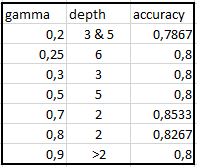

We can say that for gamma values > 0.5 we achive greater accuracy, but we can`t see any difference for gamma values less than 0.5

In [28]:
# delete????????????????????????
for depth in range(1, 20):
  clf = tree.DecisionTreeClassifier(max_depth=depth, random_state=0)
  clf = clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
  accuracy_list.append(accuracy)

In [29]:
# delete????????????????
np.shape(x_train_list)

(100, 37, 2)

### **Tree creations and testing the accuracies**

# Mallon feygei e???

In [30]:
accuracy_list = []

for depth in range(1, 15):
    accu = []
    for forest_tree in range(samp_num):
        clf = tree.DecisionTreeClassifier(max_depth=depth, random_state=0)
        clf = clf.fit(x_samples[forest_tree], y_samples[forest_tree])
        y_pred = clf.predict(X_test)
        accuracy = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
        accu.append(accuracy)
    accuracy_list.append(statistics.mean(accu))

# not the right method to compute the accuracy
# we must first make the classification using the forest and then compute the accuracy
print("****************************************************")
print(f"Accuracy based on depth: {accuracy_list}")
best_accuracy = max(accuracy_list)
# return best accuracy index
best_depth = np.argmax(accuracy_list) + 1
print(f"Best Accuracy is: {best_accuracy}% and is achived in depth: {best_depth}")
print("****************************************************")

NameError: name 'x_samples' is not defined

In [ ]:
# Just to be sure
# x train data and incices
# for i in range(samp_num):
#   # y = random.sample(X_train_data.tolist(), round(total_train_set))
#   index_value = random.sample(list(enumerate(X_train_data.tolist())), total_train_length)
#   samples.append(index_value)
# # print(samples[1][2][0])
# # print(samples)

# # x train data
# x_samples = []
# for i in range(samp_num):
#   jth_samp = []
#   for j in range(total_train_length):
#     jth_samp.append(X_train_data[samples[i][j][0]])
#   x_samples.append(jth_samp)
# # print(x_samples)


# # y train data
# y_samples = []
# for i in range(samp_num):
#   jth_samp = []
#   for j in range(total_train_length):
#     jth_samp.append(y_train_data[samples[i][j][0]])
#   y_samples.append(jth_samp)
# print(y_samples)